In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


'Colab Notebooks'  'MultiClass Heart Disease.gdoc'   scholaship.gdoc
 Membership	    pneumonia			    'Untitled Diagram'


In [ ]:
!ls "/content/drive/MyDrive/pneumonia"



pneumonia_dataset.zip


In [ ]:
!cp "/content/drive/MyDrive/pneumonia/pneumonia_dataset.zip" /content/


In [ ]:
import zipfile

zip_path = '/content/pneumonia_dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/pneumonia_dataset')


In [ ]:
!ls /content/pneumonia_dataset

chest_xray


In [ ]:
!ls /content/pneumonia_dataset/chest_xray/train



NORMAL	PNEUMONIA


In [ ]:
!ls /content/pneumonia_dataset/chest_xray/test

NORMAL	PNEUMONIA


In [ ]:
!pip install split-folders

import splitfolders

splitfolders.ratio(
    input='/content/pneumonia_dataset/chest_xray/train',
    output='/content/pneumonia_ready',
    seed=42,
    ratio=(0.85, 0.15)  # 85% train, 15% validation
)

Copying files: 5232 files [00:05, 991.06 files/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224,224)
BATCH_SIZE = 32

# Training generator with augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
).flow_from_directory(
    '/content/pneumonia_ready/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Validation generator
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/pneumonia_ready/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Test generator (untouched)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/pneumonia_dataset/chest_xray/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 4446 images belonging to 2 classes.
Found 786 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.8289 - loss: 1.2469

139/139 ━━━━━━━━━━━━━━━━━━━━ 109s 718ms/step - accuracy: 0.8290 - loss: 1.2426 - val_accuracy: 0.7417 - val_loss: 12.9501
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.8803 - loss: 0.2946

139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 653ms/step - accuracy: 0.8803 - loss: 0.2946 - val_accuracy: 0.7506 - val_loss: 1.5923
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 649ms/step - accuracy: 0.8807 - loss: 0.3812 - val_accuracy: 0.7532 - val_loss: 3.0615
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.9209 - loss: 0.2217

139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 644ms/step - accuracy: 0.9209 - loss: 0.2218 - val_accuracy: 0.9542 - val_loss: 0.1086
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 646ms/step - accuracy: 0.9288 - loss: 0.2490 - val_accuracy: 0.7455 - val_loss: 0.6530
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 657ms/step - accuracy: 0.9193 - loss: 0.2356 - val_accuracy: 0.8855 - val_loss: 0.9637
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 657ms/step - accuracy: 0.9189 - loss: 0.2627 - val_accuracy: 0.7659 - val_loss: 0.4321
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 649ms/step - accuracy: 0.9269 - loss: 0.1952 - val_accuracy: 0.8079 - val_loss: 2.3326
Epoch 9/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 648ms/step - accuracy: 0.9425 - loss: 0.1611 - val_accuracy: 0.9618 - val_loss: 0.1432


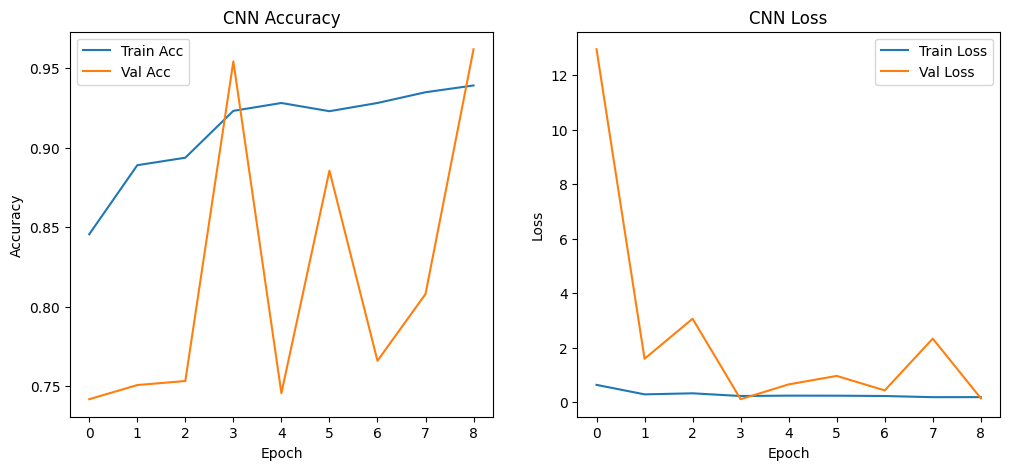

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step


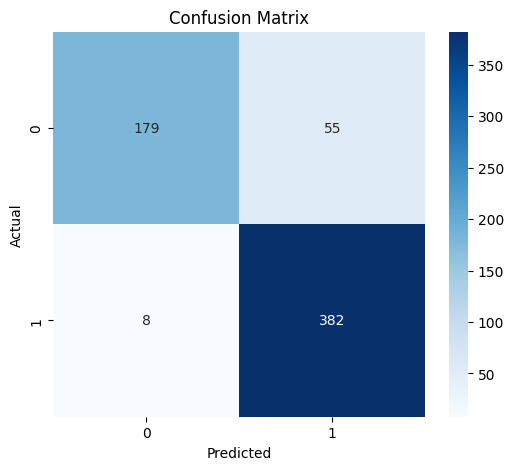

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.76      0.85       234
   PNEUMONIA       0.87      0.98      0.92       390

    accuracy                           0.90       624
   macro avg       0.92      0.87      0.89       624
weighted avg       0.91      0.90      0.90       624



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

IMG_SIZE = (224, 224, 3)

# Step 1: Build Basic CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 2: Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('basic_cnn_best.h5', save_best_only=True)
]

# Step 3: Train the Model (20 epochs)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)

# Step 4: Plot Training & Validation Accuracy/Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Evaluate on Test Set
test_steps = test_gen.samples // test_gen.batch_size + 1
y_pred_prob = model.predict(test_gen, steps=test_steps)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_gen.classes

# Step 6: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))


In [ ]:
!pip install transformers==4.30.2
!pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


# ***RestNet50 Without Fine Tuning***

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,858,305 (91.01 MB)

 Trainable params: 266,497 (1.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.8253 - loss: 0.3637

139/139 ━━━━━━━━━━━━━━━━━━━━ 130s 832ms/step - accuracy: 0.8256 - loss: 0.3632 - val_accuracy: 0.8359 - val_loss: 0.4967 - learning_rate: 0.0010
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.8855 - loss: 0.2648

139/139 ━━━━━━━━━━━━━━━━━━━━ 113s 677ms/step - accuracy: 0.8856 - loss: 0.2647 - val_accuracy: 0.7481 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.9039 - loss: 0.2401

139/139 ━━━━━━━━━━━━━━━━━━━━ 94s 673ms/step - accuracy: 0.9039 - loss: 0.2400 - val_accuracy: 0.8359 - val_loss: 0.2907 - learning_rate: 0.0010
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.9062 - loss: 0.2133

139/139 ━━━━━━━━━━━━━━━━━━━━ 94s 676ms/step - accuracy: 0.9062 - loss: 0.2134 - val_accuracy: 0.9364 - val_loss: 0.1986 - learning_rate: 0.0010
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9094 - loss: 0.2162

139/139 ━━━━━━━━━━━━━━━━━━━━ 95s 680ms/step - accuracy: 0.9094 - loss: 0.2162 - val_accuracy: 0.9364 - val_loss: 0.1607 - learning_rate: 0.0010
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 671ms/step - accuracy: 0.9018 - loss: 0.2176 - val_accuracy: 0.9364 - val_loss: 0.1626 - learning_rate: 0.0010
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 94s 673ms/step - accuracy: 0.9154 - loss: 0.2036 - val_accuracy: 0.9224 - val_loss: 0.1954 - learning_rate: 0.0010
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 92s 664ms/step - accuracy: 0.9187 - loss: 0.2017 - val_accuracy: 0.9288 - val_loss: 0.1749 - learning_rate: 0.0010
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.9179 - loss: 0.1907

139/139 ━━━━━━━━━━━━━━━━━━━━ 94s 675ms/step - accuracy: 0.9179 - loss: 0.1907 - val_accuracy: 0.9338 - val_loss: 0.1538 - learning_rate: 5.0000e-04
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.9074 - loss: 0.2143

139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 671ms/step - accuracy: 0.9074 - loss: 0.2142 - val_accuracy: 0.9440 - val_loss: 0.1424 - learning_rate: 5.0000e-04
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 666ms/step - accuracy: 0.9115 - loss: 0.2014 - val_accuracy: 0.9313 - val_loss: 0.1671 - learning_rate: 5.0000e-04
Epoch 12/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.9157 - loss: 0.2003

139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 667ms/step - accuracy: 0.9157 - loss: 0.2003 - val_accuracy: 0.9427 - val_loss: 0.1413 - learning_rate: 5.0000e-04
Epoch 13/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 672ms/step - accuracy: 0.9216 - loss: 0.1928 - val_accuracy: 0.9389 - val_loss: 0.1481 - learning_rate: 5.0000e-04
Epoch 14/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 92s 664ms/step - accuracy: 0.9195 - loss: 0.1982 - val_accuracy: 0.9427 - val_loss: 0.1426 - learning_rate: 5.0000e-04
Epoch 15/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 92s 664ms/step - accuracy: 0.9205 - loss: 0.1870 - val_accuracy: 0.9415 - val_loss: 0.1450 - learning_rate: 5.0000e-04
Epoch 16/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 92s 664ms/step - accuracy: 0.9289 - loss: 0.1774 - val_accuracy: 0.9364 - val_loss: 0.1456 - learning_rate: 2.5000e-04
Epoch 17/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9240 - loss: 0.1832

139/139 ━━━━━━━━━━━━━━━━━━━━ 94s 679ms/step - accuracy: 0.9240 - loss: 0.1832 - val_accuracy: 0.9478 - val_loss: 0.1295 - learning_rate: 2.5000e-04
Epoch 18/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 666ms/step - accuracy: 0.9289 - loss: 0.1730 - val_accuracy: 0.9415 - val_loss: 0.1346 - learning_rate: 2.5000e-04
Epoch 19/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 93s 670ms/step - accuracy: 0.9306 - loss: 0.1786 - val_accuracy: 0.9364 - val_loss: 0.1503 - learning_rate: 2.5000e-04
Epoch 20/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 92s 664ms/step - accuracy: 0.9258 - loss: 0.1829 - val_accuracy: 0.9351 - val_loss: 0.1467 - learning_rate: 2.5000e-04


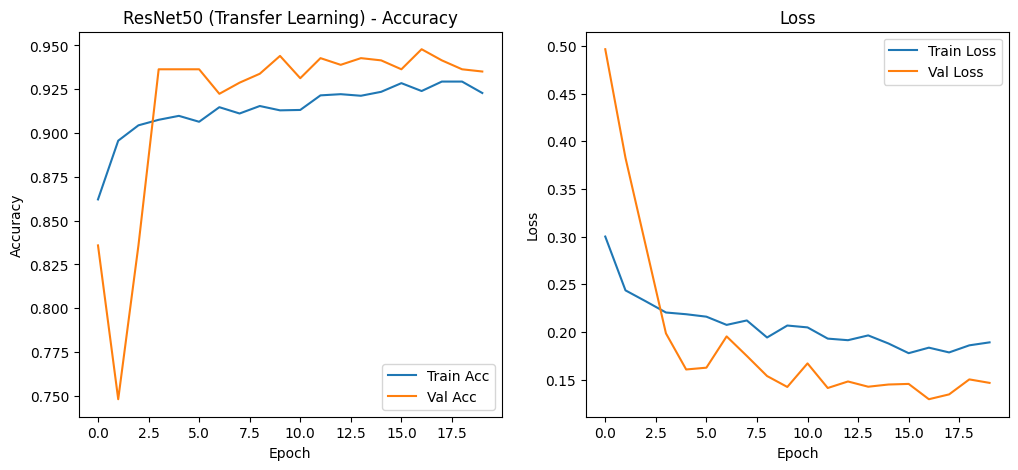

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step


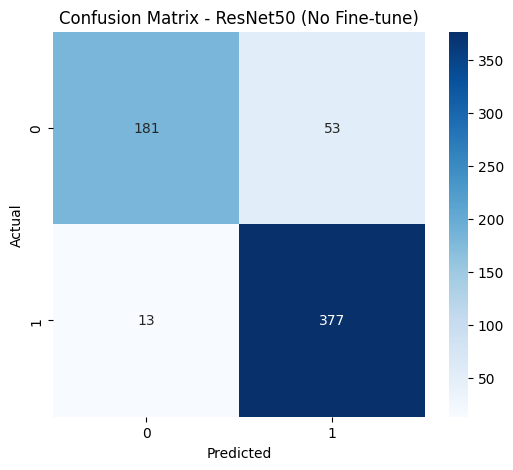

Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.77      0.85       234
   Pneumonia       0.88      0.97      0.92       390

    accuracy                           0.89       624
   macro avg       0.90      0.87      0.88       624
weighted avg       0.90      0.89      0.89       624



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

IMG_SIZE = (224, 224, 3)


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
base_model.trainable = False  # No fine-tuning


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary: Pneumonia vs Normal
])

# ======================
# Step 3: Compile (Higher LR – only head training)
# ======================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # বড় LR – head-এর জন্য
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('resnet50_transfer_best.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)
]


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('ResNet50 (Transfer Learning) - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluate on Test Set

model.load_weights('resnet50_transfer_best.h5')  # Best model

test_steps = test_gen.samples // test_gen.batch_size + 1
y_pred_prob = model.predict(test_gen, steps=test_steps)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_gen.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ResNet50 (No Fine-tune)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

In [ ]:

# Pneumonia Detection using DenseNet201


import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load Pre-trained DenseNet201 + Freeze Layers

IMG_SIZE = (224, 224, 3)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
base_model.trainable = False  # Freeze all convolutional layers


#Add Custom Head

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary: Pneumonia vs Normal
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('densenet201_transfer_best.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)
]


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('DenseNet201 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('DenseNet201 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Evaluate on Validation Set

model.load_weights('densenet201_transfer_best.h5')  # Load best model

val_steps = val_gen.samples // val_gen.batch_size + 1
y_val_prob = model.predict(val_gen, steps=val_steps)
y_val_pred = (y_val_prob > 0.5).astype(int)
y_val_true = val_gen.classes

print("\n=== Validation Results ===")
cm_val = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens')
plt.title('Validation Confusion Matrix - DenseNet201')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_val_true, y_val_pred, target_names=['Normal', 'Pneumonia']))


# Step 8: Evaluate on Test Set

test_steps = test_gen.samples // test_gen.batch_size + 1
y_test_prob = model.predict(test_gen, steps=test_steps)
y_test_pred = (y_test_prob > 0.5).astype(int)
y_test_true = test_gen.classes

print("\n=== Test Results ===")
cm_test = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix - DenseNet201')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test_true, y_test_pred, target_names=['Normal', 'Pneumonia']))


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 1920)           │         7,680 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       245,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,575,681 (70.86 MB)

 Trainable params: 249,857 (976.00 KB)

 Non-trainable params: 18,325,824 (69.91 MB)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8748 - loss: 0.2890

139/139 ━━━━━━━━━━━━━━━━━━━━ 1407s 10s/step - accuracy: 0.8751 - loss: 0.2883 - val_accuracy: 0.9580 - val_loss: 0.1236 - learning_rate: 0.0010
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9356 - loss: 0.1473

139/139 ━━━━━━━━━━━━━━━━━━━━ 1486s 11s/step - accuracy: 0.9357 - loss: 0.1472 - val_accuracy: 0.9656 - val_loss: 0.0983 - learning_rate: 0.0010
Epoch 3/20
 83/139 ━━━━━━━━━━━━━━━━━━━━ 7:49 8s/step - accuracy: 0.9557 - loss: 0.1138